# Match Analysis

# Import Library

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Pitch, create_transparent_cmap, FontManager, arrowhead_marker, Sbopen
from matplotlib.patches import Rectangle, Circle, Polygon
import pickle
import json
import matplotlib as mpl
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

# Understat Data

## Shot Map

In [138]:
match_date = '13 April 2024'
competition = 'Premier League'
season = '2023-2024'

In [233]:
url = 'shot_stat_nottingham_forest_2_-_2_wolverhampton_wanderers_(april_13_2024)'
url = f'D:\\Football\\Data\\shot_stats\\{url}.csv'
df = pd.read_csv(url)

In [234]:
home_team = df.h_team[0]
away_team = df.a_team[0]

In [235]:
home_shots = df[df.h_a == 'h'].reset_index(drop=True)
away_shots = df[df.h_a == 'a'].reset_index(drop=True)

In [236]:
home_score = home_shots[home_shots.result == 'Goal'].count()['result'] + away_shots[away_shots.result == 'OwnGoal'].count()['result']
away_score = away_shots[away_shots.result == 'Goal'].count()['result'] + home_shots[home_shots.result == 'OwnGoal'].count()['result']
home_xG = home_shots.xG.sum()
away_xG = away_shots.xG.sum()
number_home_shots = len(home_shots)
number_away_shots = len(away_shots)
number_home_on_target = home_shots[(home_shots.result == 'SavedShot') | (home_shots.result == 'Goal')].count()['result']
number_away_on_target = away_shots[(away_shots.result == 'SavedShot') | (away_shots.result == 'Goal')].count()['result']
number_home_blockedshot = home_shots[home_shots.result == 'BlockedShot'].count()['result']
number_away_blockedshot = away_shots[away_shots.result == 'BlockedShot'].count()['result']
number_home_off_target = number_home_shots - number_home_on_target
number_away_off_target = number_away_shots - number_away_on_target

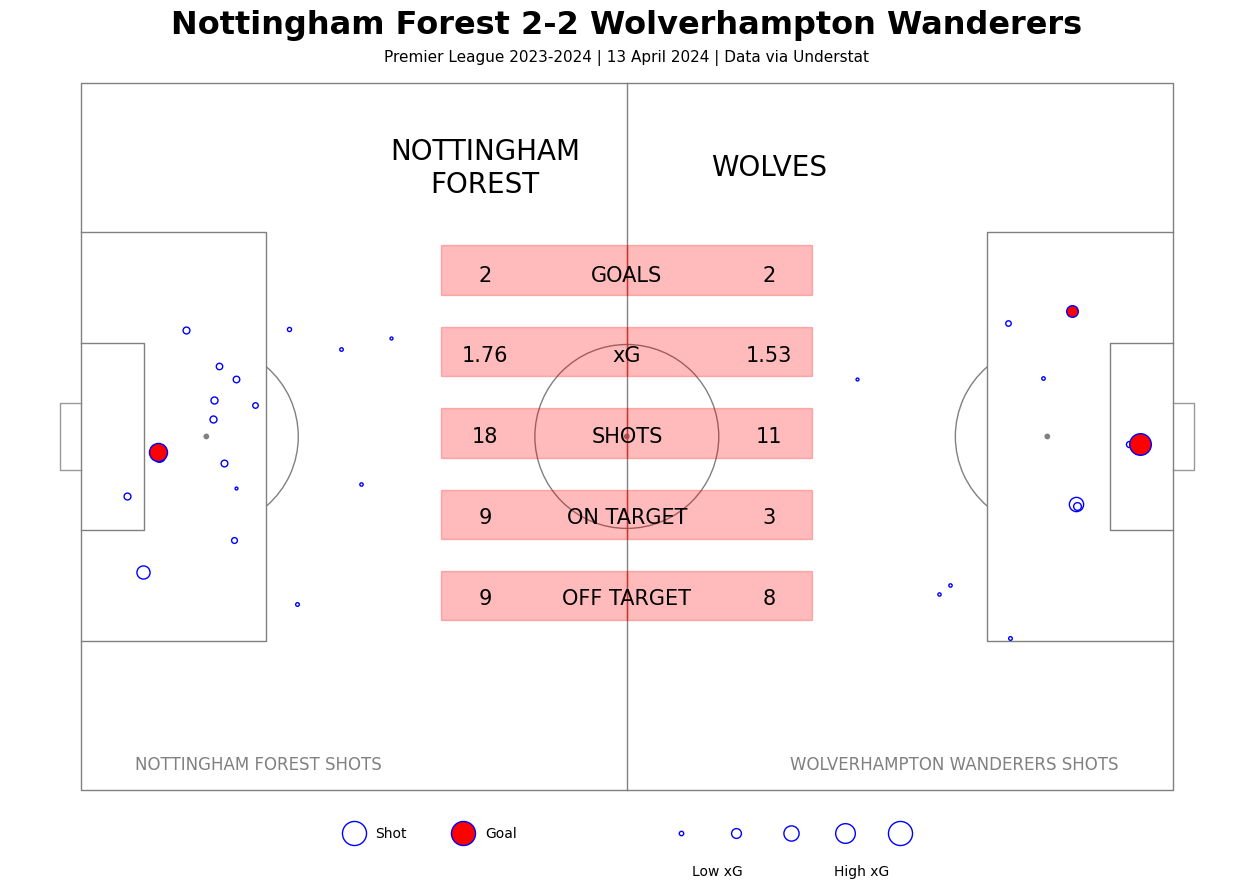

In [250]:
pitch = Pitch(
    pitch_type = 'opta',
    half = False,
    goal_type = 'box',
    goal_alpha = 0.8,
    line_color = '0.5',
    linewidth = 1,
    pad_top=10, pad_bottom=10, pad_left=10, pad_right=10,
)
fig, ax = pitch.draw(constrained_layout=True, tight_layout=True)
fig.set_size_inches(16, 9)


for i in range(len(df)):
    
    if df.result[i] == 'Goal':
        if df.xG[i] * 300 < 70:
            markersize = 70
        else:
            markersize = df.xG[i] * 300
    else:
        markersize = df.xG[i] * 300

    scatter = pitch.scatter(
        
        # Coordinates
        (1 - df.X[i]) * 100 if (df.h_a[i] == 'h') else df.X[i] * 100,
        (1 - df.Y[i]) * 100 if (df.h_a[i] == 'h') else df.Y[i] * 100,
        # Size Between 100 and 300
        s = markersize,
        # Type of Marker
        marker = "o",
        # Color Marker
        c = 'red' if (df.result[i] == 'Goal' or df.result[i] == 'OwnGoal') else 'white',
        # Color Marker Border
        edgecolors = 'blue',

        ax = ax
    )


# Stats
text = ax.text(
    x = 50, y = 50,
    s = 'GOALS'
        '\nxG'
        '\nSHOTS'
        '\nON TARGET'
        '\nOFF TARGET',
    size = 15,
    color='black',
    va='center', ha='center',
    linespacing = 4.8
)

# Home Stats
ax.text(
    x = 37, y = 50,
    s = f'{home_score}'
        f'\n{round(home_xG, 2)}'
        f'\n{number_home_shots}'
        f'\n{number_home_on_target}'
        f'\n{number_home_off_target}',
    size = 15,
    color='black',
    va='center', ha='center',
    linespacing = 4.8
)

# Away Stats
ax.text(
    x = 63, y = 50,
    s = f'{away_score}'
        f'\n{round(away_xG, 2)}'
        f'\n{number_away_shots}'
        f'\n{number_away_on_target}'
        f'\n{number_away_off_target}',
    size = 15,
    color='black',
    va='center', ha='center',
    linespacing = 4.8
)

# Home Team
ax.text(
    x = 37, y = 88,
    s = f'{home_team.upper()}',
    size = 20, ha = 'center', va = 'center'
)

# Away Team
ax.text(
    x = 63, y = 88,
    s = f'{away_team.upper()}',
    size = 20, ha = 'center', va = 'center'
)

# Home Shots
ax.text(
    x = 5, y = 3,
    s = f'{home_team.upper()} SHOTS',
    size = 12,
    c = '0.5',
    ha='left'
)

# Away Shots
ax.text(
    x = 95, y = 3,
    s = f'{away_team.upper()} SHOTS',
    size = 12,
    c = '0.5',
    ha = 'right'
)

# Box
patch = ax.add_patch(Rectangle((50,70), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,70), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,58.5), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,58.5), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,47), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,47), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,35.5), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,35.5), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,24), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,24), -17, 7, color='#FF000044'))

# Legend
xG_Legend = plt.scatter(25,-6, s=300, c='white', edgecolors='blue')
xG_Legend = plt.scatter(35,-6, s=300, c='red', edgecolors='blue')
xG_Legend = plt.scatter(55, -6, s=10, c='white', edgecolors='blue')
xG_Legend = plt.scatter(60, -6, s=50, c='white', edgecolors='blue')
xG_Legend = plt.scatter(65, -6, s=120, c='white', edgecolors='blue')
xG_Legend = plt.scatter(70, -6, s=200, c='white', edgecolors='blue')
xG_Legend = plt.scatter(75, -6, s=300, c='white', edgecolors='blue')
ax.text(x=27, y=-6.1, s='Shot', va='center')
ax.text(x=37, y=-6.1, s='Goal', va='center')
ax.text(x=56, y=-12, s='Low xG')
ax.text(x=69, y=-12, s='High xG')

# Title
ax.text(
    x = 50, y = 107,
    s = f'{home_team} {home_score}-{away_score} {away_team}',
    size = 23, ha = 'center', weight='bold'
)
ax.text(
    x = 50, y = 103,
    s = f'{competition} {season} | {match_date} | Data via Understat',
    size = 11, ha = 'center'
)

plt.show()

In [251]:
fig.savefig(f'D:\\Football\\Stats\\Shot Map\\{home_team}_VS_{away_team}_Shot_Map.png', dpi=400)

## xG Match Story

In [239]:
home_cum_xg = [0]
away_cum_xg = [0]

home_sum = 0
for i in range(len(home_shots)):
    home_sum += home_shots['xG'][i]
    home_cum_xg.append(home_sum)
    home_cum_xg.append(home_sum)

away_sum = 0
for i in range(len(away_shots)):
    away_sum += away_shots['xG'][i]
    away_cum_xg.append(away_sum)
    away_cum_xg.append(away_sum)

In [240]:
home_minute_shot = []
away_minute_shot = []

for i in range(len(home_shots)):
    home_minute_shot.append(home_shots.minute[i])
    home_minute_shot.append(home_shots.minute[i])

for i in range(len(away_shots)):
    away_minute_shot.append(away_shots.minute[i])
    away_minute_shot.append(away_shots.minute[i])

home_minute_shot.append(df.minute.max())
away_minute_shot.append(df.minute.max())

In [241]:
home_goal_minute = []
home_goal_cum_xG = []
for i in range(len(home_shots)):
    if home_shots['result'][i] == 'Goal':
        home_goal_minute.append(home_shots.minute[i])
        home_goal_cum_xG.append(home_cum_xg[i*2+1])
    else:
        pass

away_goal_minute = []
away_goal_cum_xG = []
for i in range(len(away_shots)):
    if away_shots['result'][i] == 'Goal':
        away_goal_minute.append(away_shots.minute[i])
        away_goal_cum_xG.append(away_cum_xg[i*2+1])
    else:
        pass

In [242]:
if max(home_cum_xg) > max(away_cum_xg):
    max_xg = max(home_cum_xg)
else:
    max_xg = max(away_cum_xg)

In [243]:
home_cum_xg[len(home_cum_xg) - 1]

1.76244318857789

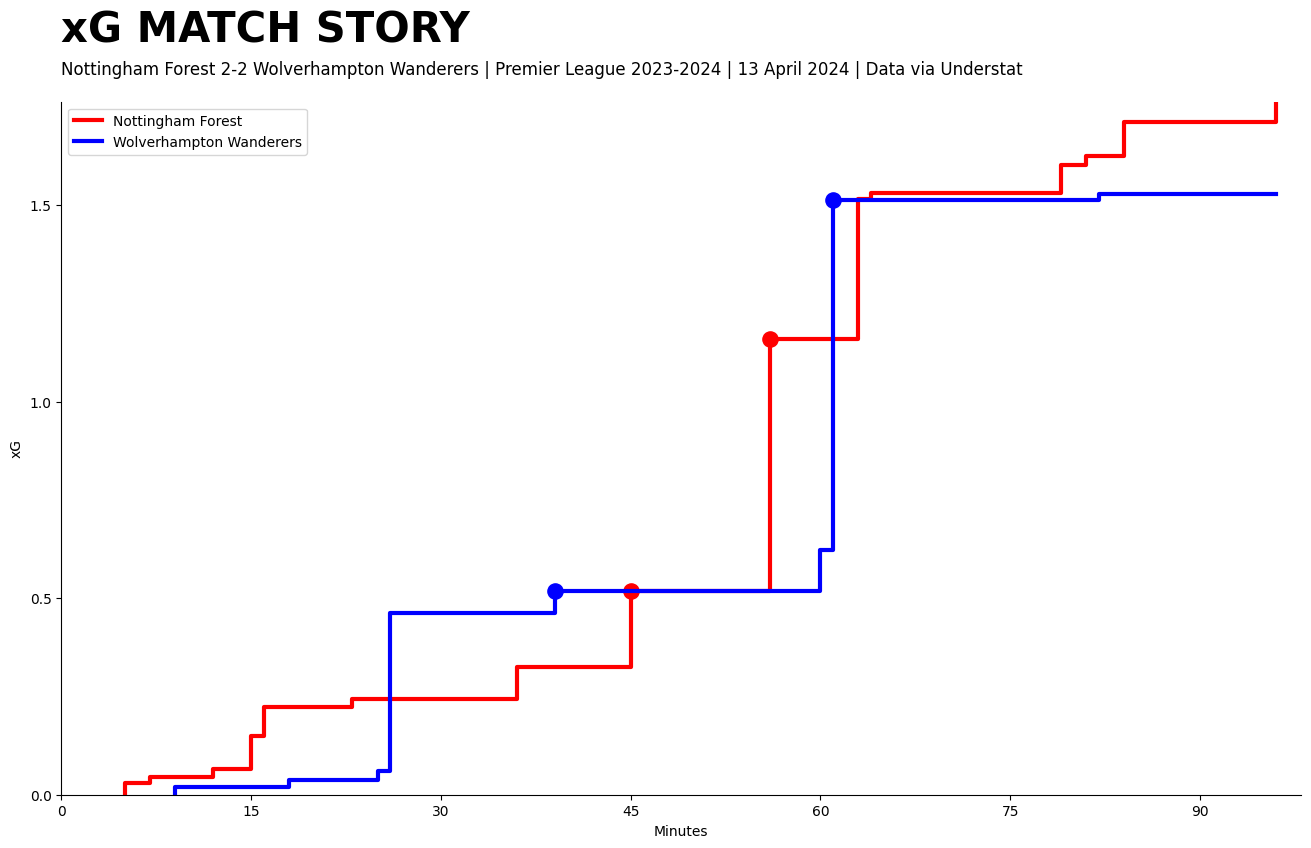

In [244]:
lw = 3

fig, ax = plt.subplots()

#plt.subplots_adjust()
fig.set_size_inches(16, 9)

ax.plot(home_minute_shot, home_cum_xg, label=home_team, c='red', lw=lw)
ax.plot(away_minute_shot, away_cum_xg, label=away_team, c='blue', lw=lw)

ax.scatter(home_goal_minute, home_goal_cum_xG, c='red', s=120)
ax.scatter(away_goal_minute, away_goal_cum_xG, c='blue', s=120)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.text(0, max_xg + max_xg/7.5, s = "xG MATCH STORY", va='top', size=30, weight='bold')
plt.text(0, max_xg + max_xg/25, s = f"{home_team} {home_score}-{away_score} {away_team} | {competition} {season} | {match_date} | Data via Understat", size=12)

plt.xlabel('Minutes')
plt.ylabel('xG')

plt.legend(loc=2)

plt.xlim(0, max(df.minute) + 2 if (max(df.minute) + 2 > 90) else 90)
plt.ylim(0, max_xg)

plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.yticks(np.arange(0, max_xg, 0.5))

plt.show()

In [245]:
fig.savefig(f'D:\\Football\\Stats\\xG Match Story\\{home_team}_VS_{away_team}_xG_Match_Story.png', dpi=400)

In [246]:
.END

SyntaxError: invalid syntax (1403085297.py, line 1)

# WhoScored Data

In [3]:
events_data_url = 'Events_Data_Roma_VS_AC Milan_Europa League_2024-04-18'
match_data_url = 'Match_Data_Roma_VS_AC Milan_Europa League_2024-04-18'

In [5]:
with open(f'D:\\Football\\Data\\WhoScored\\{events_data_url}.json') as data_file:
    events_data = json.load(data_file)
events_data = pd.read_json(events_data)

C:\Users\hamry\AppData\Local\Temp\ipykernel_16324\2112882124.py:3: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  events_data = pd.read_json(events_data)


In [6]:
with open (rf'D:\Football\Data\WhoScored\{match_data_url}.json', 'rb') as fp:
    match_data = json.load(fp)

In [7]:
Home_Team = match_data['home']['name']
Away_Team = match_data['away']['name']
Home_Team_ID = match_data['home']['teamId']
Away_Team_ID = match_data['away']['teamId']
Date = match_data['timeStamp'].split(' ')[0].split('-')[2] + '-' + match_data['timeStamp'].split(' ')[0].split('-')[1] + '-' + match_data['timeStamp'].split(' ')[0].split('-')[0]
Competition = match_data['league']
Season = match_data['season']

In [8]:
print('Home Team =', Home_Team)
print('Away Team =', Away_Team)
print('Home Team ID =', Home_Team_ID)
print('Away Team ID =', Away_Team_ID)
print('Date =', Date)
print('Competition =', Competition )
print('Season =', Season )

Home Team = Roma
Away Team = AC Milan
Home Team ID = 84
Away Team ID = 80
Date = 18-04-2024
Competition = Europa League
Season = 2023/2024


In [9]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [10]:
jerseyNumber = pd.DataFrame({'jerseyNumber': match_data['home']['formations'][0]['jerseyNumbers'] + match_data['away']['formations'][0]['jerseyNumbers'],
                             'playerId': match_data['home']['formations'][0]['playerIds'] + match_data['away']['formations'][0]['playerIds']})

In [11]:
playerIdNameDictionary = match_data['playerIdNameDictionary']
playerdict_df = pd.Series(playerIdNameDictionary).to_frame('playerName')
playerdict_df.index.name = 'playerId'
playerdict_df.index = playerdict_df.index.astype('int64')
jerseyNumber['playerId'] = jerseyNumber['playerId'].astype(object)
jerseyNumber = jerseyNumber.set_index('playerId')
kit_no = pd.merge(jerseyNumber, playerdict_df, on='playerId')

In [12]:
events_data = pd.merge(left=events_data, right=jerseyNumber, on='playerId', how='left')

### Home Team

In [13]:
Team = Home_Team
TeamId = Home_Team_ID
venue = 'home'

In [14]:
starters_player_ids = []
for i in range(11):
    starters_player_ids.append(match_data[venue]['formations'][0 if venue == 'home' else 1]['playerIds'][i])

In [15]:
playerIdNameDictionary = match_data['playerIdNameDictionary']

In [16]:
starters = {}
for player_id in starters_player_ids:
    starters[player_id] = playerIdNameDictionary[str(player_id)]

In [17]:
starters_player_name = []
for key in starters.keys():
    starters_player_name.append(starters[key])

In [18]:
# Make df with Successfull Passes until the First Substitution
mask = (events_data.type == 'Pass') & (events_data.teamId == TeamId) & (events_data.outcomeType == 'Successful') & (events_data.throwIn != True)

In [19]:
team_event = events_data[events_data['teamId'] == TeamId]

In [20]:
team_event.insert(26, 'passRecipientName', value=team_event['playerName'].shift(-1))
team_event.insert(27, 'passRecipientId', value=team_event['playerId'].shift(-1))

In [21]:
team_passes = team_event.loc[mask, ['x', 'y', 'endX', 'endY', 'playerName', 'jerseyNumber', 'passRecipientName']]

In [22]:
team_passes = team_passes.query(f"playerName == {starters_player_name} & passRecipientName == {starters_player_name}")

In [23]:
scatter_df = pd.DataFrame()

for i, name in enumerate(team_passes["playerName"].unique()):
    passx = team_passes.loc[team_passes["playerName"] == name]["x"].to_numpy()
    recx = team_passes.loc[team_passes["passRecipientName"] == name]["endX"].to_numpy()
    passy = team_passes.loc[team_passes["playerName"] == name]["y"].to_numpy()
    recy = team_passes.loc[team_passes["passRecipientName"] == name]["endY"].to_numpy()
    
    scatter_df.at[i, "player_name"] = name
    scatter_df.at[i, "jerseyNumber"] = events_data[events_data['playerName'] == name].iloc[0]['jerseyNumber']
    
    # Make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    
    # Calculate the Number of Passes
    scatter_df.at[i, "number_of_passes"] = team_passes.loc[team_passes["playerName"] == name].count().iloc[0]

# Adjust the size of Circle by Number of Passes
scatter_df['marker_size'] = (scatter_df['number_of_passes'] / scatter_df['number_of_passes'].max() * 500 + 200)

In [24]:
# Counting passes between players
team_passes["pair_key"] = team_passes.apply(lambda x: "_".join(sorted([x["playerName"], x["passRecipientName"]])), axis=1)
lines_df = team_passes.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

# Setting a Treshold of Number Passes
min_pass_count = 2
lines_df = lines_df[lines_df['pass_count'] > min_pass_count]

IndexError: single positional indexer is out-of-bounds

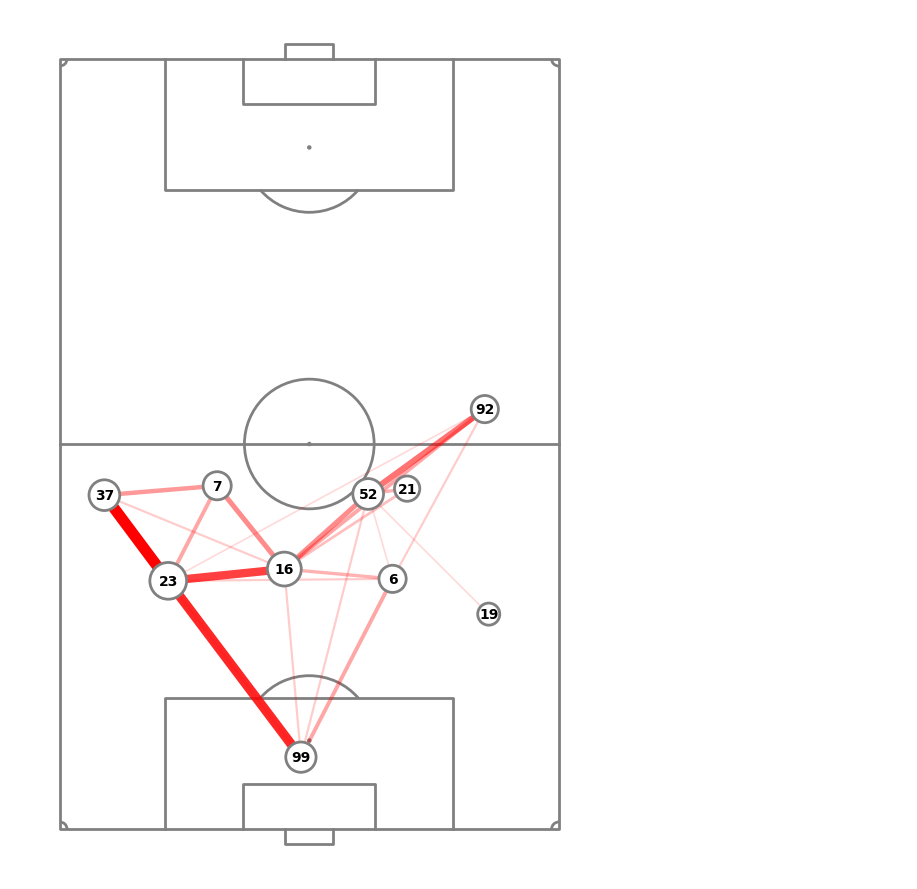

In [25]:
color = 'white'

pitch = VerticalPitch(line_color='grey', pitch_type='opta', corner_arcs=True, goal_type='box',
                      pad_bottom=10, pad_top=10, pad_left=10, pad_right=70)
fig, ax = pitch.draw(constrained_layout=True, tight_layout=True)
fig.set_size_inches(12, 9)
fig.set_facecolor(color)

pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color=color, edgecolors='grey', linewidth=2, alpha=1, ax=ax, zorder = 3)

for i, row in scatter_df.iterrows():
    pitch.annotate(int(row.jerseyNumber), xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=10, ax=ax, zorder = 4)

for i, row in lines_df.iterrows():
        link = row['pass_count']
        alpha = link / 20
        if alpha > 1:
            alpha = 1
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]

        # Take the Average Location of Players to Plot Line between Them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]

        # Adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 8)

        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                    alpha=alpha, lw=line_width, zorder=2, color="red", ax = ax)

# Title
ax.text(120, 111, s=f'{Team.upper()} PASS MAP', size=20, weight='bold')
ax.text(120, 107, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date} | Data via Opta', size=12)

# Stats
ax.text(-20, 100, s='NO.', ha='left')
ax.text(-42, 100, s='PLAYER', ha='left')
ax.text(-30, 100, s='PASS', ha='left')

# Legend
pitch.lines(18, -20, 18, -27,
           color='red', lw=8, ax=ax)
ax.text(-30, 18, s='Very Frequent', ha='left', va='center')
pitch.lines(13, -20, 13, -27,
           color='red', transparent=True, alpha_start=0.6, alpha_end=0.6, lw=6, ax=ax)
ax.text(-30, 13, s='Frequent', ha='left', va='center')
pitch.lines(8, -20, 8, -27,
           color='red', transparent=True, alpha_start=0.4, alpha_end=0.4, lw=4, ax=ax)
ax.text(-30, 8, s='Fairly Frequent', ha='left', va='center')
pitch.lines(3, -20, 3, -27,
           color='red', transparent=True, alpha_start=0.2, alpha_end=0.2, lw=2, ax=ax)
ax.text(-30, 3, s='Rare', ha='left', va='center')

x, y = -22, 95
for i in range(11):
    player_name = starters_player_name[i]
    player_name_index = scatter_df.index[scatter_df['player_name'] == player_name].tolist()[0]
    plt.scatter(x, y, c=color, s=scatter_df.iloc[player_name_index]['marker_size'], edgecolors='grey', linewidth=2)
    ax.text(x, y, s=int(scatter_df.iloc[player_name_index]['jerseyNumber']), ha='center', va='center')
    ax.text(x-20, y, s=scatter_df.iloc[player_name_index]['player_name'], va='center')
    ax.text(x-12, y, s=int(scatter_df.iloc[player_name_index]['number_of_passes']), ha='center', va='center')
    y -= 7

plt.show()
fig.savefig(f'D:\\Football\\Stats\\Passing Network\\{Team}_Pass_Map_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

#### HeatMaps

d:\Programming\Code\venv\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


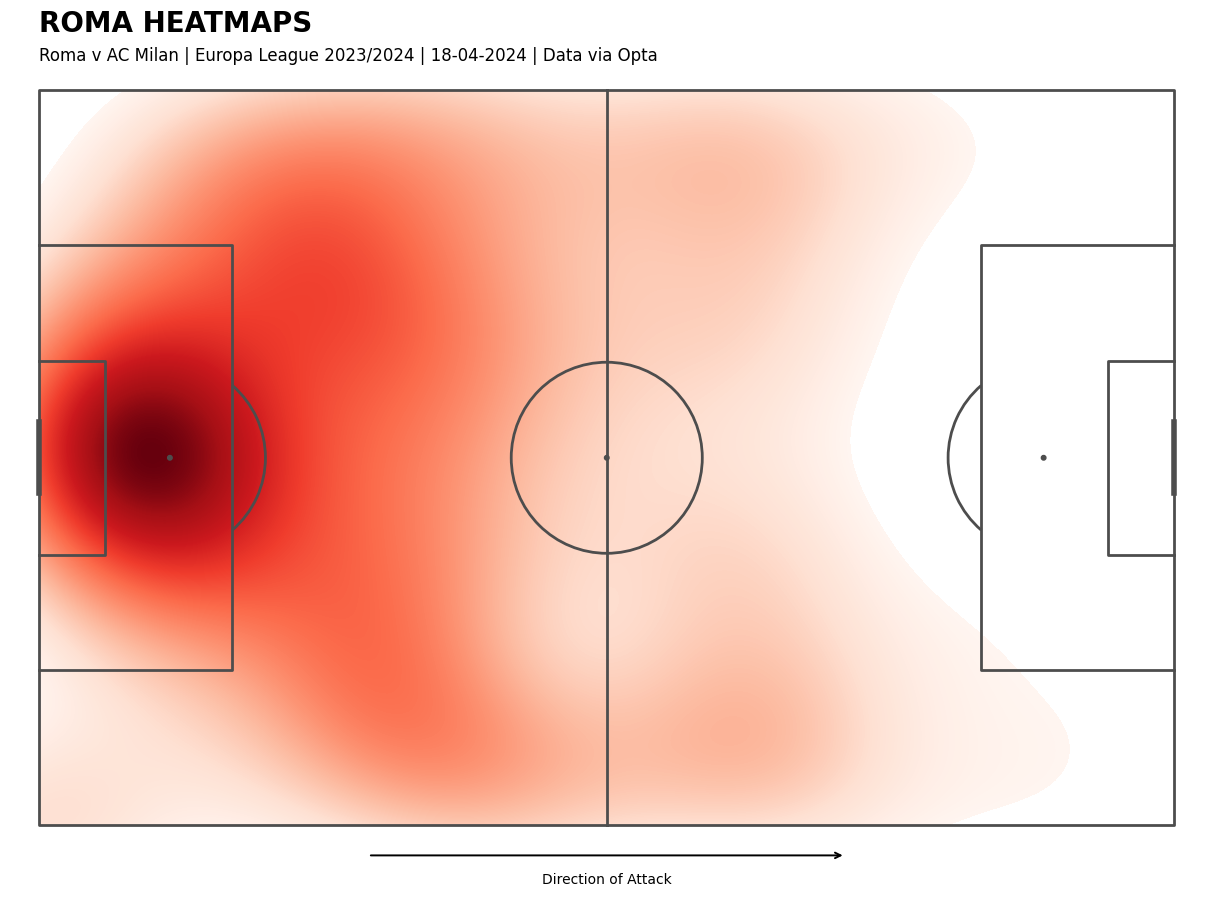

In [77]:
pitch = Pitch(line_color='0.3', pitch_type='opta', line_zorder=2)
fig, ax = pitch.draw(constrained_layout=True, tight_layout=True)
fig.set_size_inches(16, 9)

pitch.kdeplot(
    team_event['x'], team_event['y'], ax=ax,
    cmap='Reds', shade=True, n_levels=10000, zorder=1
)

ax.annotate('', xy=(0.3, -0.001), xycoords='axes fraction', xytext=(0.7, -0.001),
arrowprops=dict(arrowstyle="<-", color='black', lw=1.4))
ax.text(50, -8, s='Direction of Attack', ha='center', size=10)

# Title
ax.text(0, 108, s=f'{Team.upper()} HEATMAPS', size=20, weight='bold')
ax.text(0, 104, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date} | Data via Opta', size=12)

plt.show()

In [ ]:
fig.savefig(f'D:\\Football\\Stats\\Heatmaps\\{Team}_Heatmaps_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

#### Passes Location

In [78]:
passes = team_event[team_event.type == 'Pass']

In [81]:
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

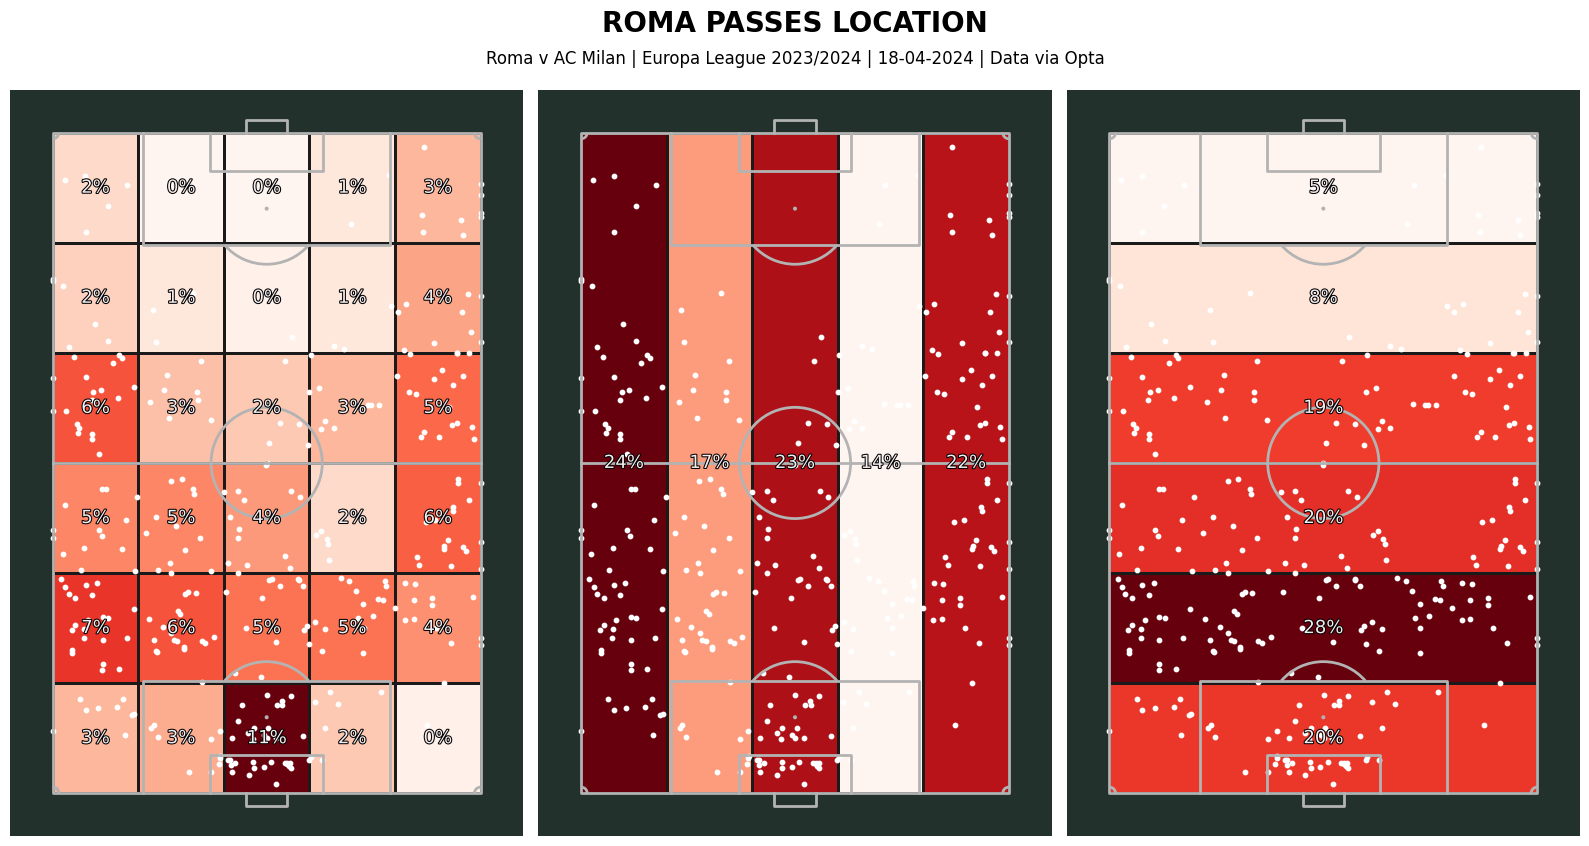

In [84]:
color = 'white'

pitch = VerticalPitch(line_color='0.7', pitch_type='opta', corner_arcs=True, goal_type='box', line_zorder=2, pitch_color='#22312b',
                      pad_left=10, pad_right=10, pad_top=10, pad_bottom=10)
fig, axs = plt.subplots(1,3, constrained_layout=True, tight_layout=True)
fig.set_size_inches(16, 9)
fig.set_facecolor(color)

bins = [(6, 5), (1, 5), (6, 1)]
for i, bin in enumerate(bins):
    pitch.draw(ax=axs[i])
    bin_statistic = pitch.bin_statistic(passes.x, passes.y, statistic='count', bins=bin)
    pitch.heatmap(bin_statistic, ax=axs[i], cmap='Reds', edgecolors='0.1')
    pitch.scatter(passes.x, passes.y, c='white', s=10, ax=axs[i])
    bin_statistic['statistic'] = bin_statistic['statistic'] / bin_statistic['statistic'].sum()
    pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=13, ax=axs[i], ha='center', va='center', str_format='{:.0%}', path_effects=path_eff)

plt.suptitle(f'{Team.upper()} PASSES LOCATION', size=20, weight='bold', ha='center', x=0.5)
fig.text(0.5, 0.92, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date} | Data via Opta', size=12, ha='center')

plt.show()

In [ ]:
fig.savefig(f'D:\\Football\\Stats\\Passes Location\\{Team}_Passes_Location_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

### Away Team

In [ ]:
Team = Away_Team
TeamId = Away_Team_ID
venue = 'away'

In [ ]:
starters_player_ids = []
for i in range(11):
    starters_player_ids.append(match_data[venue]['formations'][0 if venue == 'home' else 1]['playerIds'][i])

In [ ]:
playerIdNameDictionary = match_data['playerIdNameDictionary']

In [ ]:
starters = {}
for player_id in starters_player_ids:
    starters[player_id] = playerIdNameDictionary[str(player_id)]

In [ ]:
starters_player_name = []
for key in starters.keys():
    starters_player_name.append(starters[key])

In [ ]:
# Make df with Successfull Passes until the First Substitution
mask = (events_data.type == 'Pass') & (events_data.teamId == TeamId) & (events_data.outcomeType == 'Successful') & (events_data.throwIn != True)

In [ ]:
team_event = events_data[events_data['teamId'] == TeamId]

In [ ]:
team_event.insert(26, 'passRecipientName', value=team_event['playerName'].shift(-1))
team_event.insert(27, 'passRecipientId', value=team_event['playerId'].shift(-1))

In [ ]:
team_passes = team_event.loc[mask, ['x', 'y', 'endX', 'endY', 'playerName', 'jerseyNumber', 'passRecipientName']]

In [ ]:
team_passes = team_passes.query(f"playerName == {starters_player_name} & passRecipientName == {starters_player_name}")

In [ ]:
scatter_df = pd.DataFrame()

for i, name in enumerate(team_passes["playerName"].unique()):
    passx = team_passes.loc[team_passes["playerName"] == name]["x"].to_numpy()
    recx = team_passes.loc[team_passes["passRecipientName"] == name]["endX"].to_numpy()
    passy = team_passes.loc[team_passes["playerName"] == name]["y"].to_numpy()
    recy = team_passes.loc[team_passes["passRecipientName"] == name]["endY"].to_numpy()
    
    scatter_df.at[i, "player_name"] = name
    scatter_df.at[i, "jerseyNumber"] = events_data[events_data['playerName'] == name].iloc[0]['jerseyNumber']
    
    # Make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    
    # Calculate the Number of Passes
    scatter_df.at[i, "number_of_passes"] = team_passes.loc[team_passes["playerName"] == name].count().iloc[0]

# Adjust the size of Circle by Number of Passes
scatter_df['marker_size'] = (scatter_df['number_of_passes'] / scatter_df['number_of_passes'].max() * 500 + 200)

In [ ]:
# Counting passes between players
team_passes["pair_key"] = team_passes.apply(lambda x: "_".join(sorted([x["playerName"], x["passRecipientName"]])), axis=1)
lines_df = team_passes.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

# Setting a Treshold of Number Passes
min_pass_count = 2
lines_df = lines_df[lines_df['pass_count'] > min_pass_count]

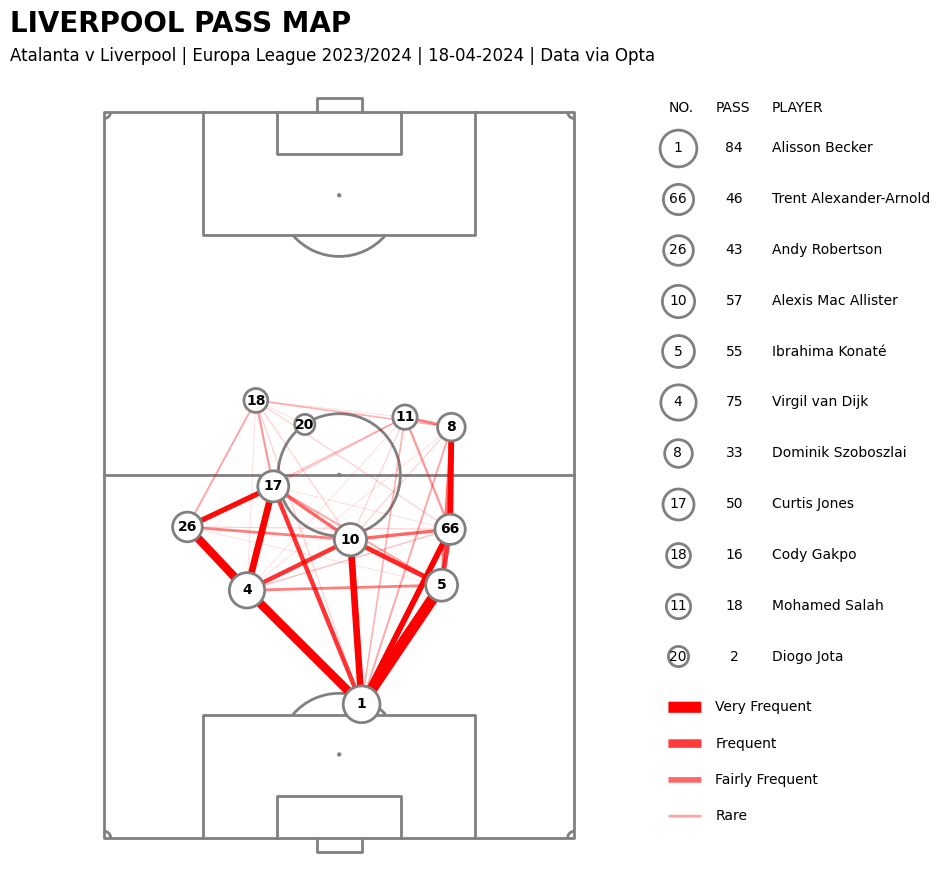

In [ ]:
color = 'white'

pitch = VerticalPitch(line_color='grey', pitch_type='opta', corner_arcs=True, goal_type='box',
                      pad_bottom=10, pad_top=10, pad_left=10, pad_right=70)
fig, ax = pitch.draw(constrained_layout=True, tight_layout=True)
fig.set_size_inches(12, 9)
fig.set_facecolor(color)

pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color=color, edgecolors='grey', linewidth=2, alpha=1, ax=ax, zorder = 3)

for i, row in scatter_df.iterrows():
    pitch.annotate(int(row.jerseyNumber), xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=10, ax=ax, zorder = 4)

for i, row in lines_df.iterrows():
        link = row['pass_count']
        alpha = link / 20
        if alpha > 1:
            alpha = 1
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]

        # Take the Average Location of Players to Plot Line between Them 
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]

        # Adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 8)

        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                    alpha=alpha, lw=line_width, zorder=2, color="red", ax = ax)

# Title
ax.text(120, 111, s=f'{Team.upper()} PASS MAP', size=20, weight='bold')
ax.text(120, 107, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date} | Data via Opta', size=12)

# Stats
ax.text(-20, 100, s='NO.', ha='left')
ax.text(-42, 100, s='PLAYER', ha='left')
ax.text(-30, 100, s='PASS', ha='left')

# Legend
pitch.lines(18, -20, 18, -27,
           color='red', lw=8, ax=ax)
ax.text(-30, 18, s='Very Frequent', ha='left', va='center')
pitch.lines(13, -20, 13, -27,
           color='red', transparent=True, alpha_start=0.6, alpha_end=0.6, lw=6, ax=ax)
ax.text(-30, 13, s='Frequent', ha='left', va='center')
pitch.lines(8, -20, 8, -27,
           color='red', transparent=True, alpha_start=0.4, alpha_end=0.4, lw=4, ax=ax)
ax.text(-30, 8, s='Fairly Frequent', ha='left', va='center')
pitch.lines(3, -20, 3, -27,
           color='red', transparent=True, alpha_start=0.2, alpha_end=0.2, lw=2, ax=ax)
ax.text(-30, 3, s='Rare', ha='left', va='center')

x, y = -22, 95
for i in range(11):
    player_name = starters_player_name[i]
    player_name_index = scatter_df.index[scatter_df['player_name'] == player_name].tolist()[0]
    plt.scatter(x, y, c=color, s=scatter_df.iloc[player_name_index]['marker_size'], edgecolors='grey', linewidth=2)
    ax.text(x, y, s=int(scatter_df.iloc[player_name_index]['jerseyNumber']), ha='center', va='center')
    ax.text(x-20, y, s=scatter_df.iloc[player_name_index]['player_name'], va='center')
    ax.text(x-12, y, s=int(scatter_df.iloc[player_name_index]['number_of_passes']), ha='center', va='center')
    y -= 7

plt.show()
fig.savefig(f'D:\\Football\\Stats\\Passing Network\\{Team}_Pass_Map_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

#### Heatmaps

d:\Programming\Code\venv\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


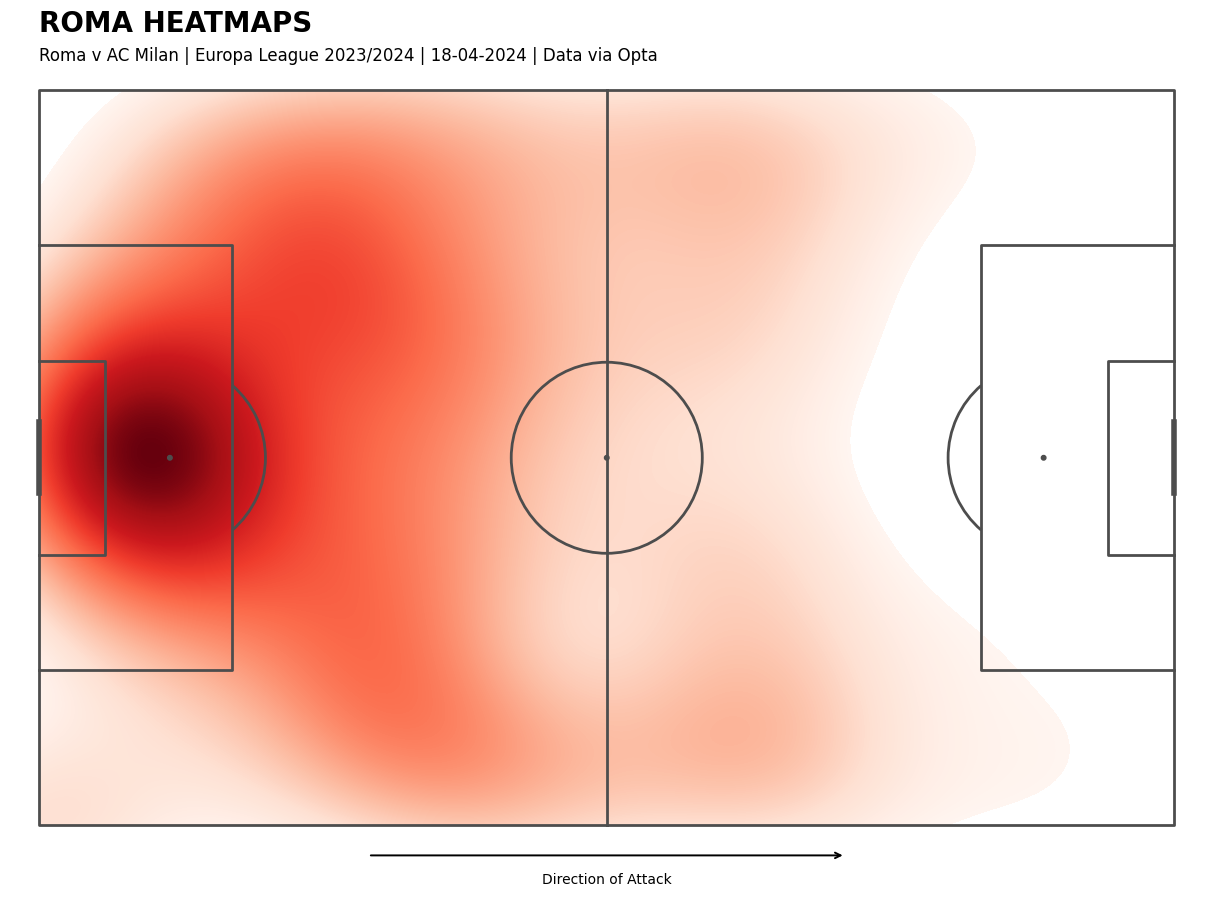

In [76]:
pitch = Pitch(line_color='0.3', pitch_type='opta', line_zorder=2)
fig, ax = pitch.draw(constrained_layout=False, tight_layout=True)
fig.set_size_inches(16, 9)

pitch.kdeplot(
    team_event['x'], team_event['y'], ax=ax,
    cmap='Reds', shade=True, n_levels=10000, zorder=1
)

ax.annotate('', xy=(0.3, -0.001), xycoords='axes fraction', xytext=(0.7, -0.001),
arrowprops=dict(arrowstyle="<-", color='black', lw=1.4))
ax.text(50, -8, s='Direction of Attack', ha='center', size=10)

# Title
ax.text(0, 108, s=f'{Team.upper()} HEATMAPS', size=20, weight='bold')
ax.text(0, 104, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date} | Data via Opta', size=12)

plt.show()

In [ ]:
fig.savefig(f'D:\\Football\\Stats\\Heatmaps\\{Team}_Heatmaps_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

#### Passes Location

In [ ]:
passes = team_event[team_event.type == 'Pass']

In [ ]:
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='black'),
            path_effects.Normal()]

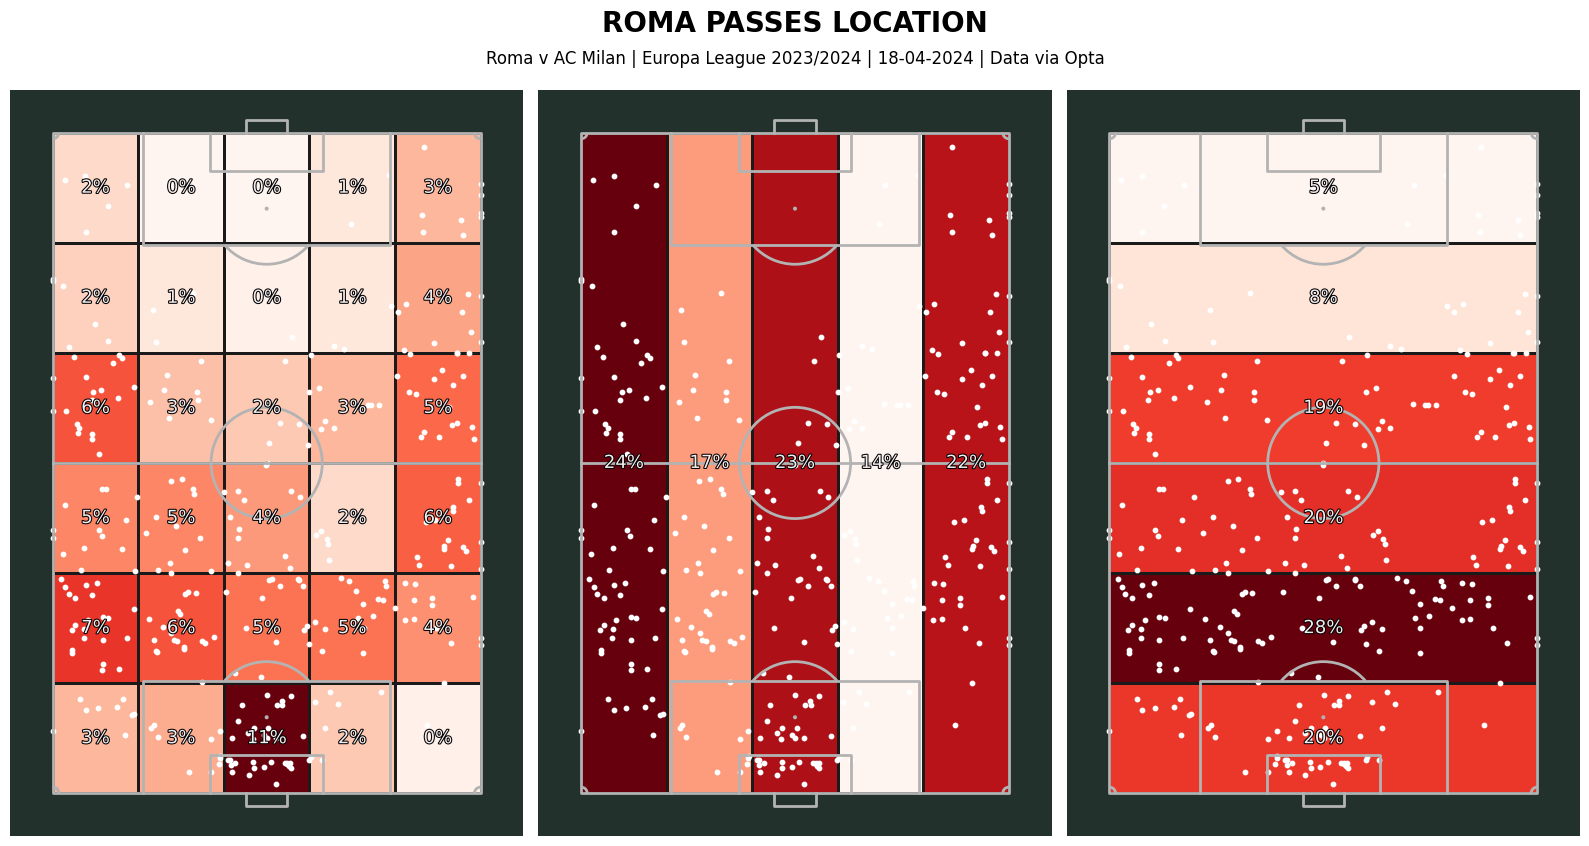

In [ ]:
color = 'white'

pitch = VerticalPitch(line_color='0.7', pitch_type='opta', corner_arcs=True, goal_type='box', line_zorder=2, pitch_color='#22312b',
                      pad_left=10, pad_right=10, pad_top=10, pad_bottom=10)
fig, axs = plt.subplots(1,3, constrained_layout=True, tight_layout=True)
fig.set_size_inches(16, 9)
fig.set_facecolor(color)

bins = [(6, 5), (1, 5), (6, 1)]
for i, bin in enumerate(bins):
    pitch.draw(ax=axs[i])
    bin_statistic = pitch.bin_statistic(passes.x, passes.y, statistic='count', bins=bin)
    pitch.heatmap(bin_statistic, ax=axs[i], cmap='Reds', edgecolors='0.1')
    pitch.scatter(passes.x, passes.y, c='white', s=10, ax=axs[i])
    bin_statistic['statistic'] = bin_statistic['statistic'] / bin_statistic['statistic'].sum()
    pitch.label_heatmap(bin_statistic, color='#f4edf0', fontsize=13, ax=axs[i], ha='center', va='center', str_format='{:.0%}', path_effects=path_eff)

plt.suptitle(f'{Team.upper()} PASSES LOCATION', size=20, weight='bold', ha='center', x=0.5)
fig.text(0.5, 0.92, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date} | Data via Opta', size=12, ha='center')

plt.show()

In [ ]:
fig.savefig(f'D:\\Football\\Stats\\Passes Location\\{Team}_Passes_Location_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

## Team Stats

## Player Stats

### Home

In [ ]:
playerId = match_data['home']['formations'][0]['playerIds']
playerIdNameDictionary = match_data['playerIdNameDictionary']
home_player = []
for id in playerId:
    home_player.append(playerIdNameDictionary[str(id)])

In [ ]:
team_events = events_data[events_data['h_a'] == 'h']

In [ ]:
Passing = team_events[team_events['type'] == 'Pass'].reset_index(drop=True)
passes_attempted = Passing.groupby('playerName')[['type']].count()
passes_completed = Passing[Passing['outcomeType'] == 'Successful'].groupby('playerName')[['outcomeType']].count()
key_passes = {}
for name in home_player:
    key_passes[name] = 0
    for i in range(len(Passing)): 
        if Passing.iloc[i]['playerName'] == name:
            if Passing.iloc[i]['keyPassLong'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassShort'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassCross'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassCorner'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassThroughball'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassFreekick'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassThrowin'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassOther'] == True:
                key_passes[name] += 1
            else:
                pass
        else:
            pass
key_passes = pd.DataFrame.from_dict(key_passes, orient='index')
key_passes.index.name = 'playerName'
assist = team_events.groupby('playerName')[['assist']].sum()
PASSING = pd.merge(passes_attempted, passes_completed, on='playerName', how='outer')
PASSING = pd.merge(PASSING, key_passes, on='playerName', how='outer')
PASSING = pd.merge(PASSING, assist, on='playerName', how='outer')
PASSING = PASSING.rename(columns={'type': 'Attempted', 'outcomeType': 'Successful', 0: 'Key'})
PASSING = PASSING.reindex(home_player)
PASSING = PASSING.fillna(0)
PASSING = PASSING.astype(int)

In [ ]:
Shooting = team_events[(team_events['type'] == 'Goal') | (team_events['type'] == 'MissedShots') | (team_events['type'] == 'SavedShot') | (team_events['type'] == 'ShotOnPost')].reset_index(drop=True)
attempted = Shooting.groupby('playerName')[['type']].count().rename(columns={'type': 'Attempted'})
#on_target = Shooting.groupby('playerName')['type'].apply(lambda x: (x=='SavedShot').sum()).reset_index(name='On Target')
on_target = Shooting.groupby('playerName')[['shotOnTarget']].sum()
goal = team_events[(team_events['type'] == 'Goal')].groupby('playerName')[['type']].count().rename(columns={'type': 'Goal'})
SHOOTING = pd.merge(pd.merge(attempted, on_target, on='playerName', how='outer'), goal, on='playerName', how='outer')

In [ ]:
clearance = team_events[team_events['type'] == 'Clearance'].groupby('playerName')[['type']].count().rename(columns={'type': 'Clearance'})
interception = team_events[team_events['type'] == 'Interception'].groupby('playerName')[['type']].count().rename(columns={'type': 'Interception'})
tackle = team_events[team_events['type'] == 'Tackle'].groupby('playerName')[['type']].count().rename(columns={'type': 'Tackle'})
tackle_won = team_events[team_events['type'] == 'Tackle'].groupby('playerName')[['tackleWon']].sum()
aerial = team_events[team_events['type'] == 'Aerial'].groupby('playerName')[['type']].count().rename(columns={'type': 'Aerial'})
aerial_won = team_events[team_events['type'] == 'Aerial'].groupby('playerName')[['duelAerialWon']].sum()
DEFENCE = pd.merge(clearance, interception, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, tackle, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, tackle_won, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, aerial, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, aerial_won, on='playerName', how='outer')

In [ ]:
take_on = team_events[team_events['type'] == 'TakeOn'].groupby('playerName')[['type']].count().rename(columns={'type': 'TakeOn'})
dribble_won = team_events.groupby('playerName')[['dribbleWon']].sum()
DRIBBLE = pd.merge(take_on, dribble_won, on='playerName', how='outer')

In [ ]:
player_statistics = pd.merge(pd.merge(PASSING, SHOOTING, on='playerName', how='outer'), pd.merge(DEFENCE, DRIBBLE, on='playerName', how='outer'), on='playerName', how='outer')
player_statistics = player_statistics.reindex(home_player)
player_statistics = player_statistics.fillna(0)
player_statistics = player_statistics.astype(int)
player_statistics = pd.merge(player_statistics, kit_no, on='playerName', how='inner')

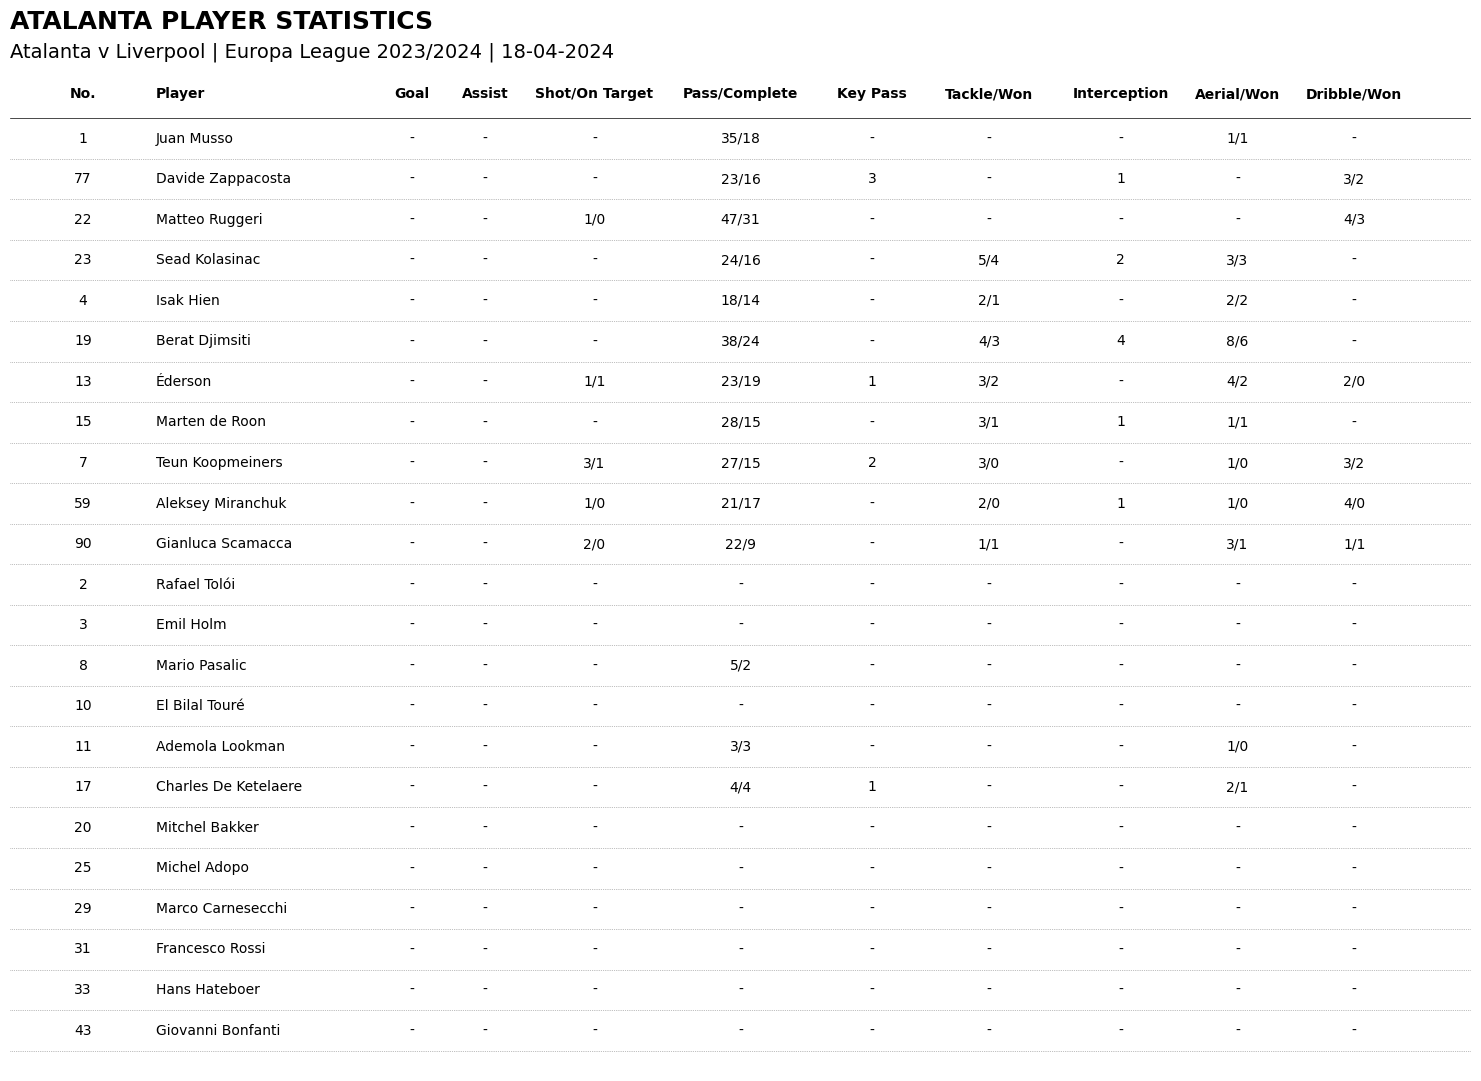

In [ ]:
mpl.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots(figsize=(16,12))

# set the number of rows and cols
rows = len(player_statistics)
cols = 9

# set up the axis limits with "spacing" (a bit of padding on each side)
ax.set_ylim(-1, rows + 1.5)
ax.set_xlim(0, cols + 1)

for row in range(rows):
    col_num = 0
    d = player_statistics.iloc[row]

    # Kit No
    ax.text(x=.5, y=rows - row - 1, s=d['jerseyNumber'], va='center', ha='center')
    # player name column
    col_num += 1
    ax.text(x=col_num, y=rows - row - 1, s=d['playerName'], va='center', ha='left')

    # goal
    col_num += 1.75
    ax.text(x=col_num, y=rows - row - 1, s=d['Goal'] if (d['Goal'] > 0) else '-', va='center', ha='center')
    # assist
    col_num += .5
    ax.text(x=col_num, y=rows - row - 1, s=d['assist'] if (d['assist'] > 0) else '-', va='center', ha='center')

    # shot
    col_num += .75
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Attempted_y']}/{d['shotOnTarget']}' if (d['Attempted_y'] > 0) else '-', va='center', ha='center')

    # passes attempted/successful column
    col_num += 1
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Attempted_x']}/{d['Successful']}' if (d['Attempted_x'] > 0) else '-', va='center', ha='center')
    # key passes column
    col_num += .9
    ax.text(x=col_num, y=rows - row - 1, s=d['Key'] if (d['Key'] > 0) else '-', va='center', ha='center')
    
    # tackle
    col_num += .8
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Tackle']}/{d['tackleWon']}' if (d['Tackle'] > 0) else '-', va='center', ha='center')
    # Interception
    col_num += .9
    ax.text(x=col_num, y=rows - row - 1, s=d['Interception'] if (d['Interception'] > 0) else '-', va='center', ha='center')
    # Aerial/duelAerialWon
    col_num += .8
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Aerial']}/{d['duelAerialWon']}' if (d['Aerial'] > 0) else '-', va='center', ha='center')

    # TakeOn/dribbleWon
    col_num += .8
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['TakeOn']}/{d['dribbleWon']}' if (d['TakeOn'] > 0) else '-', va='center', ha='center')

# Add column headers
# plot them at height y=9.75 to decrease the space to the
# first data row (you'll see why later)
col_num = 0
col_num += 1
ax.text(col_num, rows, 'Player', weight='bold', ha='left')
col_num += 1.75
ax.text(col_num, rows, 'Goal', weight='bold', ha='center')
col_num += .5
ax.text(col_num, rows, 'Assist', weight='bold', ha='center')
col_num += .75
ax.text(x=col_num, y=rows, s='Shot/On Target', ha='center', weight='bold')
col_num += 1
ax.text(x=col_num, y=rows, s='Pass/Complete', ha='center', weight='bold')
col_num += .9
ax.text(col_num, rows, 'Key Pass', weight='bold', ha='center')
col_num += .8
ax.text(x=col_num, y=rows, s='Tackle/Won', ha='center', weight='bold')
col_num += .9
ax.text(col_num, rows, 'Interception', weight='bold', ha='center')
col_num += .8
ax.text(x=col_num, y=rows, s='Aerial/Won', ha='center', weight='bold')
col_num += .8
ax.text(x=col_num, y=rows, s='Dribble/Won', ha='center', weight='bold')

ax.text(x=0.5, y=rows, s='No.', weight='bold', ha='center' )

# Next up: formatting!
# let's add some gridlines
for row in range(rows):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

# let's add a main header divider
# remember that we plotted the header row slightly closer to the first data row
ax.plot([0, cols + 1], [rows - 0.5, rows - 0.5], lw='.5', c='black')

# highlight the column we are sorting by
# I will use a rectangle patch for this
# this can be a bit fiddly but given our coordinate space we can easily automate this!
# set the starting position (left bottom corner), then set a width and height
# the trick is to set the alpha (transparency) to a low number!
rect = patches.Rectangle((1.65, -.5), .65, y, lw=1, ec='none', fc='grey', alpha=.2, zorder=-1)
#ax.add_patch(rect)

# now the magic piece, hide the axis!
ax.axis('off')

# We can also add a title to our table
ax.set_title(f'{Home_Team.upper()} PLAYER STATISTICS', loc='left', fontsize=18, weight='bold')
ax.text(x=0, y=rows+1, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date}', fontsize=14)

plt.tight_layout(pad=5)
plt.show()
fig.savefig(f'D:\\Football\\Stats\\Player Statistics\\{Home_Team}_Player_Statistics_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

### Away

In [ ]:
playerId = match_data['away']['formations'][0]['playerIds']
playerIdNameDictionary = match_data['playerIdNameDictionary']
home_player = []
for id in playerId:
    home_player.append(playerIdNameDictionary[str(id)])

In [ ]:
team_events = events_data[events_data['h_a'] == 'a']

In [ ]:
Passing = team_events[team_events['type'] == 'Pass'].reset_index(drop=True)
passes_attempted = Passing.groupby('playerName')[['type']].count()
passes_completed = Passing[Passing['outcomeType'] == 'Successful'].groupby('playerName')[['outcomeType']].count()
key_passes = {}
for name in home_player:
    key_passes[name] = 0
    for i in range(len(Passing)): 
        if Passing.iloc[i]['playerName'] == name:
            if Passing.iloc[i]['keyPassLong'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassShort'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassCross'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassCorner'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassThroughball'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassFreekick'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassThrowin'] == True:
                key_passes[name] += 1
            elif Passing.iloc[i]['keyPassOther'] == True:
                key_passes[name] += 1
            else:
                pass
        else:
            pass
key_passes = pd.DataFrame.from_dict(key_passes, orient='index')
key_passes.index.name = 'playerName'
assist = team_events.groupby('playerName')[['assist']].sum()
PASSING = pd.merge(passes_attempted, passes_completed, on='playerName', how='outer')
PASSING = pd.merge(PASSING, key_passes, on='playerName', how='outer')
PASSING = pd.merge(PASSING, assist, on='playerName', how='outer')
PASSING = PASSING.rename(columns={'type': 'Attempted', 'outcomeType': 'Successful', 0: 'Key'})
PASSING = PASSING.reindex(home_player)
PASSING = PASSING.fillna(0)
PASSING = PASSING.astype(int)

In [ ]:
Shooting = team_events[(team_events['type'] == 'Goal') | (team_events['type'] == 'MissedShots') | (team_events['type'] == 'SavedShot') | (team_events['type'] == 'ShotOnPost')].reset_index(drop=True)
attempted = Shooting.groupby('playerName')[['type']].count().rename(columns={'type': 'Attempted'})
#on_target = Shooting.groupby('playerName')['type'].apply(lambda x: (x=='SavedShot').sum()).reset_index(name='On Target')
on_target = Shooting.groupby('playerName')[['shotOnTarget']].sum()
goal = team_events[(team_events['type'] == 'Goal')].groupby('playerName')[['type']].count().rename(columns={'type': 'Goal'})
SHOOTING = pd.merge(pd.merge(attempted, on_target, on='playerName', how='outer'), goal, on='playerName', how='outer')

In [ ]:
clearance = team_events[team_events['type'] == 'Clearance'].groupby('playerName')[['type']].count().rename(columns={'type': 'Clearance'})
interception = team_events[team_events['type'] == 'Interception'].groupby('playerName')[['type']].count().rename(columns={'type': 'Interception'})
tackle = team_events[team_events['type'] == 'Tackle'].groupby('playerName')[['type']].count().rename(columns={'type': 'Tackle'})
tackle_won = team_events[team_events['type'] == 'Tackle'].groupby('playerName')[['tackleWon']].sum()
aerial = team_events[team_events['type'] == 'Aerial'].groupby('playerName')[['type']].count().rename(columns={'type': 'Aerial'})
aerial_won = team_events[team_events['type'] == 'Aerial'].groupby('playerName')[['duelAerialWon']].sum()
DEFENCE = pd.merge(clearance, interception, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, tackle, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, tackle_won, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, aerial, on='playerName', how='outer')
DEFENCE = pd.merge(DEFENCE, aerial_won, on='playerName', how='outer')

In [ ]:
take_on = team_events[team_events['type'] == 'TakeOn'].groupby('playerName')[['type']].count().rename(columns={'type': 'TakeOn'})
dribble_won = team_events.groupby('playerName')[['dribbleWon']].sum()
DRIBBLE = pd.merge(take_on, dribble_won, on='playerName', how='outer')

In [ ]:
player_statistics = pd.merge(pd.merge(PASSING, SHOOTING, on='playerName', how='outer'), pd.merge(DEFENCE, DRIBBLE, on='playerName', how='outer'), on='playerName', how='outer')
player_statistics = player_statistics.reindex(home_player)
player_statistics = player_statistics.fillna(0)
player_statistics = player_statistics.astype(int)
player_statistics = pd.merge(player_statistics, kit_no, on='playerName', how='inner')

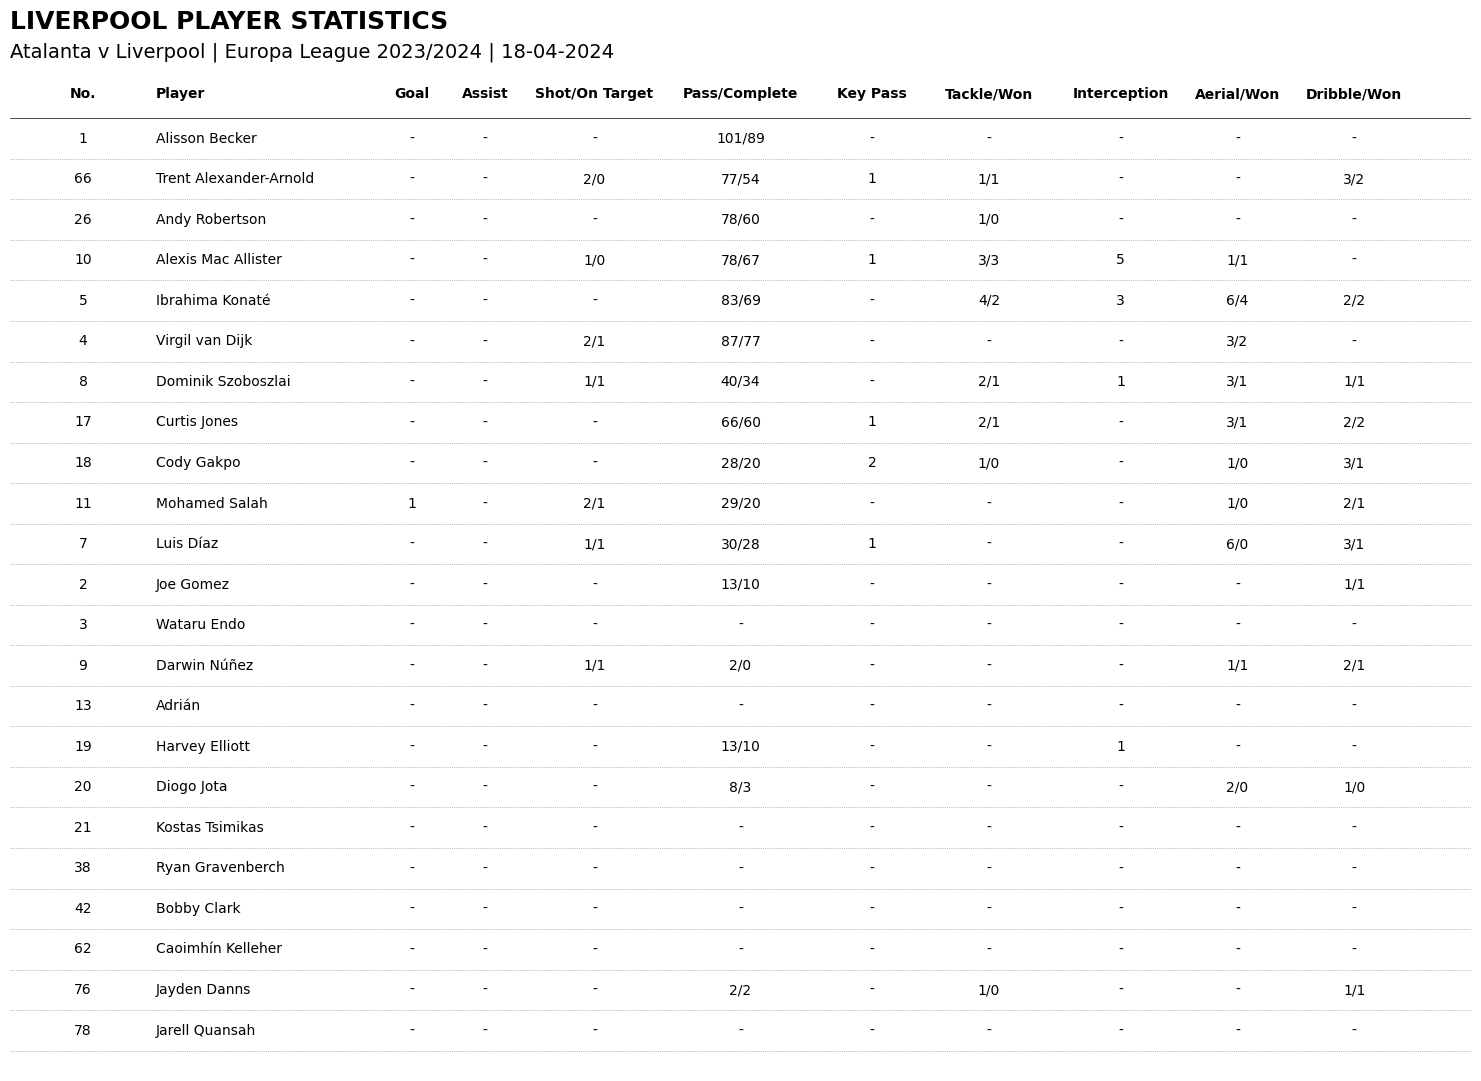

In [ ]:
mpl.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots(figsize=(16,12))

# set the number of rows and cols
rows = len(player_statistics)
cols = 9

# set up the axis limits with "spacing" (a bit of padding on each side)
ax.set_ylim(-1, rows + 1.5)
ax.set_xlim(0, cols + 1)

for row in range(rows):
    col_num = 0
    d = player_statistics.iloc[row]

    # Kit No
    ax.text(x=.5, y=rows - row - 1, s=d['jerseyNumber'], va='center', ha='center')
    # player name column
    col_num += 1
    ax.text(x=col_num, y=rows - row - 1, s=d['playerName'], va='center', ha='left')

    # goal
    col_num += 1.75
    ax.text(x=col_num, y=rows - row - 1, s=d['Goal'] if (d['Goal'] > 0) else '-', va='center', ha='center')
    # assist
    col_num += .5
    ax.text(x=col_num, y=rows - row - 1, s=d['assist'] if (d['assist'] > 0) else '-', va='center', ha='center')

    # shot
    col_num += .75
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Attempted_y']}/{d['shotOnTarget']}' if (d['Attempted_y'] > 0) else '-', va='center', ha='center')

    # passes attempted/successful column
    col_num += 1
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Attempted_x']}/{d['Successful']}' if (d['Attempted_x'] > 0) else '-', va='center', ha='center')
    # key passes column
    col_num += .9
    ax.text(x=col_num, y=rows - row - 1, s=d['Key'] if (d['Key'] > 0) else '-', va='center', ha='center')
    
    # tackle
    col_num += .8
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Tackle']}/{d['tackleWon']}' if (d['Tackle'] > 0) else '-', va='center', ha='center')
    # Interception
    col_num += .9
    ax.text(x=col_num, y=rows - row - 1, s=d['Interception'] if (d['Interception'] > 0) else '-', va='center', ha='center')
    # Aerial/duelAerialWon
    col_num += .8
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['Aerial']}/{d['duelAerialWon']}' if (d['Aerial'] > 0) else '-', va='center', ha='center')

    # TakeOn/dribbleWon
    col_num += .8
    ax.text(x=col_num, y=rows - row - 1, s=f'{d['TakeOn']}/{d['dribbleWon']}' if (d['TakeOn'] > 0) else '-', va='center', ha='center')

# Add column headers
# plot them at height y=9.75 to decrease the space to the
# first data row (you'll see why later)
col_num = 0
col_num += 1
ax.text(col_num, rows, 'Player', weight='bold', ha='left')
col_num += 1.75
ax.text(col_num, rows, 'Goal', weight='bold', ha='center')
col_num += .5
ax.text(col_num, rows, 'Assist', weight='bold', ha='center')
col_num += .75
ax.text(x=col_num, y=rows, s='Shot/On Target', ha='center', weight='bold')
col_num += 1
ax.text(x=col_num, y=rows, s='Pass/Complete', ha='center', weight='bold')
col_num += .9
ax.text(col_num, rows, 'Key Pass', weight='bold', ha='center')
col_num += .8
ax.text(x=col_num, y=rows, s='Tackle/Won', ha='center', weight='bold')
col_num += .9
ax.text(col_num, rows, 'Interception', weight='bold', ha='center')
col_num += .8
ax.text(x=col_num, y=rows, s='Aerial/Won', ha='center', weight='bold')
col_num += .8
ax.text(x=col_num, y=rows, s='Dribble/Won', ha='center', weight='bold')

ax.text(x=0.5, y=rows, s='No.', weight='bold', ha='center' )

# Next up: formatting!
# let's add some gridlines
for row in range(rows):
    ax.plot([0, cols + 1], [row -.5, row - .5], ls=':', lw='.5', c='grey')

# let's add a main header divider
# remember that we plotted the header row slightly closer to the first data row
ax.plot([0, cols + 1], [rows - 0.5, rows - 0.5], lw='.5', c='black')

# highlight the column we are sorting by
# I will use a rectangle patch for this
# this can be a bit fiddly but given our coordinate space we can easily automate this!
# set the starting position (left bottom corner), then set a width and height
# the trick is to set the alpha (transparency) to a low number!
rect = patches.Rectangle((1.65, -.5), .65, y, lw=1, ec='none', fc='grey', alpha=.2, zorder=-1)
#ax.add_patch(rect)

# now the magic piece, hide the axis!
ax.axis('off')

# We can also add a title to our table
ax.set_title(f'{Away_Team.upper()} PLAYER STATISTICS', loc='left', fontsize=18, weight='bold')
ax.text(x=0, y=rows+1, s=f'{Home_Team} v {Away_Team} | {Competition} {Season} | {Date}', fontsize=14)

plt.tight_layout(pad=5)
plt.show()
fig.savefig(f'D:\\Football\\Stats\\Player Statistics\\{Away_Team}_Player_Statistics_{Home_Team}_VS_{Away_Team}_{Date}.png', dpi=400)

In [ ]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

## Join FBREF

In [ ]:
file_name = 'Shots_Data_Roma_VS_Milan'
fbref_data_url = rf'D:\Football\Data\FBREF\{file_name}.csv'
shots_fbref_data = pd.read_csv(fbref_data_url)
shots_fbref_data = shots_fbref_data.drop(columns='Unnamed: 0')

In [ ]:
for i in range(len(shots_fbref_data)):
    if '+' in shots_fbref_data['Minute'][i]:
        shots_fbref_data['Minute'][i] = int(shots_fbref_data['Minute'][i].split('+')[0]) + int(shots_fbref_data['Minute'][i].split('+')[1])
    else:
        shots_fbref_data['Minute'][i] = int(shots_fbref_data['Minute'][i])

C:\Users\hamry\AppData\Local\Temp\ipykernel_19188\1947440667.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  shots_fbref_data['Minute'][i] = int(shots_fbref_data['Minute'][i])
C:\Users\hamry\AppData\Local\Temp\ipykernel_19188\1947440667.

In [ ]:
shots_whoscored_data = events_data[(events_data['type'] == 'MissedShots') | (events_data['type'] == 'SavedShot') | (events_data['type'] == 'Goal') | (events_data['type'] == 'ShotOnPost')].reset_index(drop=True)

In [ ]:
if len(shots_fbref_data) == len(shots_whoscored_data):
    shots_whoscored_data['xG'] = shots_fbref_data['xG']
    shots_whoscored_data['PSxG'] = shots_fbref_data['PSxG']
else:
    raise ValueError

### Shot Map

In [ ]:
df = shots_whoscored_data

In [ ]:
home_team = Home_Team
away_team = Away_Team

In [ ]:
home_shots = df[df.h_a == 'h'].reset_index(drop=True)
away_shots = df[df.h_a == 'a'].reset_index(drop=True)

In [ ]:
home_score = home_shots[home_shots.type == 'Goal'].count()['type'] + away_shots[away_shots.type == 'OwnGoal'].count()['type']
away_score = away_shots[away_shots.type == 'Goal'].count()['type'] + home_shots[home_shots.type == 'OwnGoal'].count()['type']
home_xG = home_shots.xG.sum()
away_xG = away_shots.xG.sum()
number_home_shots = home_shots[home_shots.shotsTotal == True].count()['type']
number_away_shots = away_shots[away_shots.shotsTotal == True].count()['type']
number_home_on_target = home_shots[home_shots.shotOnTarget == True].count()['type']
number_away_on_target = away_shots[away_shots.shotOnTarget == True].count()['type']
number_home_blockedshot = home_shots[home_shots.shotBlocked == True].count()['type']
number_away_blockedshot = away_shots[away_shots.shotBlocked == True].count()['type']
number_home_off_target = home_shots[home_shots.shotOffTarget == True].count()['type']
number_away_off_target = away_shots[away_shots.shotOffTarget == True].count()['type']
number_home_on_post = home_shots[home_shots.shotOnPost == True].count()['type']
number_away_on_post = away_shots[away_shots.shotOnPost == True].count()['type']

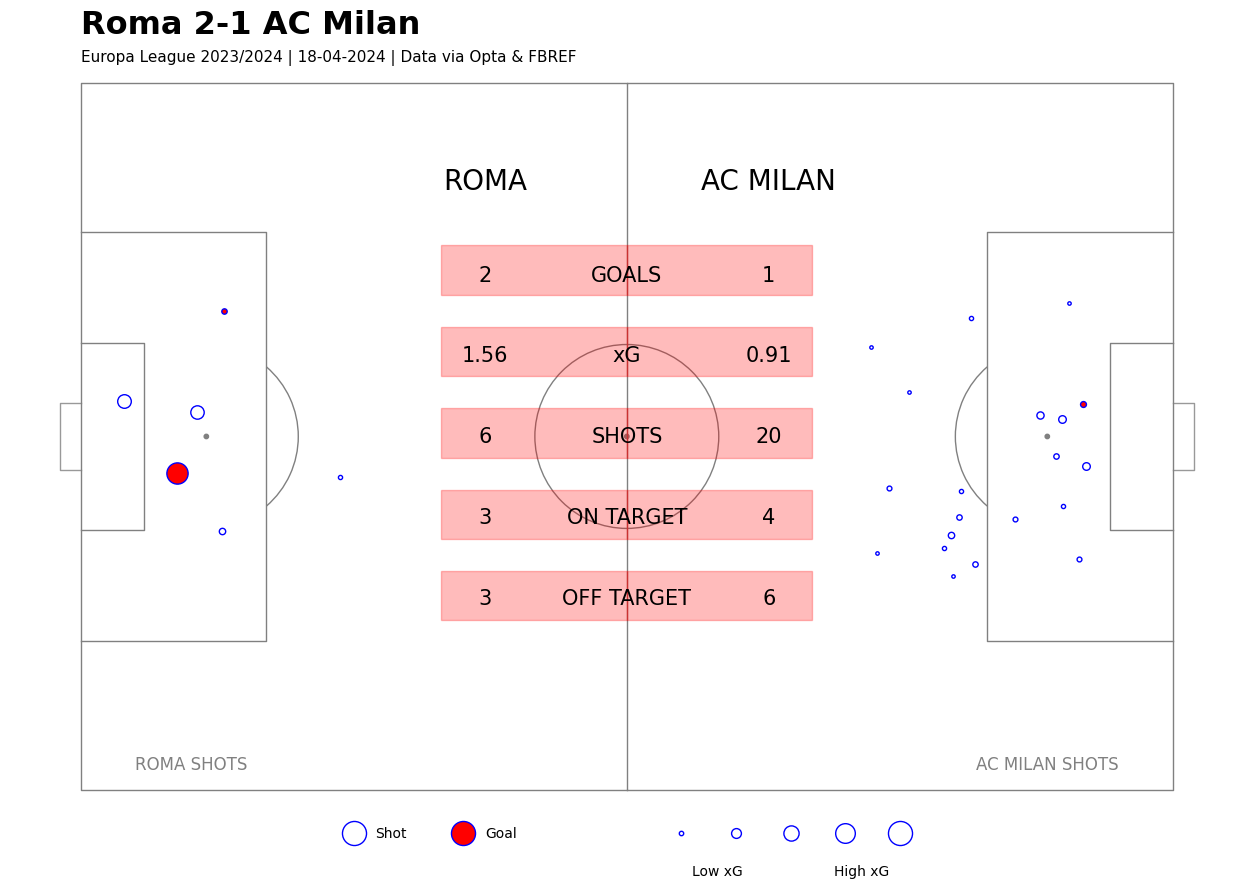

In [ ]:
pitch = Pitch(
    pitch_type = 'opta',
    half = False,
    goal_type = 'box',
    goal_alpha = 0.8,
    line_color = '0.5',
    linewidth = 1,
    pad_top=10, pad_bottom=10, pad_left=10, pad_right=10,
)
fig, ax = pitch.draw(constrained_layout=True, tight_layout=True)
fig.set_size_inches(16, 9)


for i in range(len(df)):
    scatter = pitch.scatter(
        
        # Coordinates
        (100 - df.x[i]) if (df.h_a[i] == 'h') else df.x[i],
        (100 - df.y[i]) if (df.h_a[i] == 'h') else df.y[i],
        # Size Between 100 and 1000
        s = (df.xG[i] * 300),
        # Type of Marker
        marker = "o",
        # Color Marker
        c = 'red' if (df.type[i] == 'Goal' or df.type[i] == 'OwnGoal') else 'white',
        # Color Marker Border
        edgecolors = 'blue',

        ax = ax
    )


# Stats
text = ax.text(
    x = 50, y = 50,
    s = 'GOALS'
        '\nxG'
        '\nSHOTS'
        '\nON TARGET'
        '\nOFF TARGET',
    size = 15,
    color='black',
    va='center', ha='center',
    linespacing = 4.8
)

# Home Stats
ax.text(
    x = 37, y = 50,
    s = f'{home_score}'
        f'\n{round(home_xG, 2)}'
        f'\n{number_home_shots}'
        f'\n{number_home_on_target}'
        f'\n{number_home_off_target}',
    size = 15,
    color='black',
    va='center', ha='center',
    linespacing = 4.8
)

# Away Stats
ax.text(
    x = 63, y = 50,
    s = f'{away_score}'
        f'\n{round(away_xG, 2)}'
        f'\n{number_away_shots}'
        f'\n{number_away_on_target}'
        f'\n{number_away_off_target}',
    size = 15,
    color='black',
    va='center', ha='center',
    linespacing = 4.8
)

# Home Team
ax.text(
    x = 37, y = 85,
    s = f'{home_team.upper()}',
    size = 20, ha = 'center'
)

# Away Team
ax.text(
    x = 63, y = 85,
    s = f'{away_team.upper()}',
    size = 20, ha = 'center'
)

# Home Shots
ax.text(
    x = 5, y = 3,
    s = f'{home_team.upper()} SHOTS',
    size = 12,
    c = '0.5',
    ha='left'
)

# Away Shots
ax.text(
    x = 95, y = 3,
    s = f'{away_team.upper()} SHOTS',
    size = 12,
    c = '0.5',
    ha = 'right'
)

# Box
patch = ax.add_patch(Rectangle((50,70), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,70), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,58.5), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,58.5), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,47), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,47), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,35.5), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,35.5), -17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,24), 17, 7, color='#FF000044'))
patch = ax.add_patch(Rectangle((50,24), -17, 7, color='#FF000044'))

# Legend
xG_Legend = plt.scatter(25,-6, s=300, c='white', edgecolors='blue')
xG_Legend = plt.scatter(35,-6, s=300, c='red', edgecolors='blue')
xG_Legend = plt.scatter(55, -6, s=10, c='white', edgecolors='blue')
xG_Legend = plt.scatter(60, -6, s=50, c='white', edgecolors='blue')
xG_Legend = plt.scatter(65, -6, s=120, c='white', edgecolors='blue')
xG_Legend = plt.scatter(70, -6, s=200, c='white', edgecolors='blue')
xG_Legend = plt.scatter(75, -6, s=300, c='white', edgecolors='blue')
ax.text(x=27, y=-6.1, s='Shot', va='center')
ax.text(x=37, y=-6.1, s='Goal', va='center')
ax.text(x=56, y=-12, s='Low xG')
ax.text(x=69, y=-12, s='High xG')

# Title
ax.text(
    x = 0, y = 107,
    s = f'{home_team} {home_score}-{away_score} {away_team}',
    size = 23, ha = 'left', weight='bold'
)
ax.text(
    x = 0, y = 103,
    s = f'{Competition} {Season} | {Date} | Data via Opta & FBREF',
    size = 11, ha = 'left'
)

plt.show()

In [ ]:
fig.savefig(f'D:\\Football\\Stats\\Shot Map\\{home_team}_VS_{away_team}_Shot_Map.png', dpi=400)

### xG Match Story

In [ ]:
home_cum_xg = [0]
away_cum_xg = [0]

home_sum = 0
for i in range(len(home_shots)):
    home_sum += home_shots['xG'][i]
    home_cum_xg.append(home_sum)
    home_cum_xg.append(home_sum)

away_sum = 0
for i in range(len(away_shots)):
    away_sum += away_shots['xG'][i]
    away_cum_xg.append(away_sum)
    away_cum_xg.append(away_sum)

In [ ]:
home_minute_shot = []
away_minute_shot = []

for i in range(len(home_shots)):
    home_minute_shot.append(home_shots.minute[i])
    home_minute_shot.append(home_shots.minute[i])

for i in range(len(away_shots)):
    away_minute_shot.append(away_shots.minute[i])
    away_minute_shot.append(away_shots.minute[i])

home_minute_shot.append(df.minute.max())
away_minute_shot.append(df.minute.max())

In [ ]:
away_shots.type.unique()

array(['MissedShots', 'SavedShot', 'Goal'], dtype=object)

In [ ]:
home_shots.sample(3)

,id,eventId,minute,second,teamId,h_a,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,matchId,startDate,startTime,score,ftScore,htScore,etScore,venueName,maxMinute,playerId,playerName,endX,endY,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,isGoal,blockedX,blockedY,cardType,shotBodyType,situation,shotSixYardBox,shotPenaltyArea,shotOboxTotal,shotOpenPlay,shotCounter,shotSetPiece,shotDirectCorner,shotOffTarget,shotOnPost,shotOnTarget,shotsTotal,shotBlocked,shotRightFoot,shotLeftFoot,shotHead,shotObp,goalSixYardBox,goalPenaltyArea,goalObox,goalOpenPlay,goalCounter,goalSetPiece,penaltyScored,goalOwn,goalNormal,goalRightFoot,goalLeftFoot,goalHead,goalObp,shortPassInaccurate,shortPassAccurate,passCorner,passCornerAccurate,passCornerInaccurate,passFreekick,passBack,passForward,passLeft,passRight,keyPassLong,keyPassShort,keyPassCross,keyPassCorner,keyPassThroughball,keyPassFreekick,keyPassThrowin,keyPassOther,assistCross,assistCorner,assistThroughball,assistFreekick,assistThrowin,assistOther,dribbleLost,dribbleWon,challengeLost,interceptionWon,clearanceHead,outfielderBlock,passCrossBlockedDefensive,outfielderBlockedPass,offsideGiven,offsideProvoked,foulGiven,foulCommitted,yellowCard,voidYellowCard,secondYellow,redCard,turnover,dispossessed,saveLowLeft,saveHighLeft,saveLowCentre,saveHighCentre,saveLowRight,saveHighRight,saveHands,saveFeet,saveObp,saveSixYardBox,savePenaltyArea,saveObox,keeperDivingSave,standingSave,closeMissHigh,closeMissHighLeft,closeMissHighRight,closeMissLeft,closeMissRight,shotOffTargetInsideBox,touches,assist,ballRecovery,clearanceEffective,clearanceTotal,clearanceOffTheLine,dribbleLastman,errorLeadsToGoal,errorLeadsToShot,intentionalAssist,interceptionAll,interceptionIntheBox,keeperClaimHighLost,keeperClaimHighWon,keeperClaimLost,keeperClaimWon,keeperOneToOneWon,parriedDanger,parriedSafe,collected,keeperPenaltySaved,keeperSaveInTheBox,keeperSaveTotal,keeperSmother,keeperSweeperLost,keeperMissed,passAccurate,passBackZoneInaccurate,passForwardZoneAccurate,passInaccurate,passAccuracy,cornerAwarded,passKey,passChipped,passCrossAccurate,passCrossInaccurate,passLongBallAccurate,passLongBallInaccurate,passThroughBallAccurate,passThroughBallInaccurate,passThroughBallInacurate,passFreekickAccurate,passFreekickInaccurate,penaltyConceded,penaltyMissed,penaltyWon,passRightFoot,passLeftFoot,passHead,sixYardBlock,tackleLastMan,tackleLost,tackleWon,cleanSheetGK,cleanSheetDL,cleanSheetDC,cleanSheetDR,cleanSheetDML,cleanSheetDMC,cleanSheetDMR,cleanSheetML,cleanSheetMC,cleanSheetMR,cleanSheetAML,cleanSheetAMC,cleanSheetAMR,cleanSheetFWL,cleanSheetFW,cleanSheetFWR,cleanSheetSub,goalConcededByTeamGK,goalConcededByTeamDL,goalConcededByTeamDC,goalConcededByTeamDR,goalConcededByTeamDML,goalConcededByTeamDMC,goalConcededByTeamDMR,goalConcededByTeamML,goalConcededByTeamMC,goalConcededByTeamMR,goalConcededByTeamAML,goalConcededByTeamAMC,goalConcededByTeamAMR,goalConcededByTeamFWL,goalConcededByTeamFW,goalConcededByTeamFWR,goalConcededByTeamSub,goalConcededOutsideBoxGoalkeeper,goalScoredByTeamGK,goalScoredByTeamDL,goalScoredByTeamDC,goalScoredByTeamDR,goalScoredByTeamDML,goalScoredByTeamDMC,goalScoredByTeamDMR,goalScoredByTeamML,goalScoredByTeamMC,goalScoredByTeamMR,goalScoredByTeamAML,goalScoredByTeamAMC,goalScoredByTeamAMR,goalScoredByTeamFWL,goalScoredByTeamFW,goalScoredByTeamFWR,goalScoredByTeamSub,aerialSuccess,duelAerialWon,duelAerialLost,offensiveDuel,defensiveDuel,bigChanceMissed,bigChanceScored,bigChanceCreated,overrun,successfulFinalThirdPasses,punches,penaltyShootoutScored,penaltyShootoutMissedOffTarget,penaltyShootoutSaved,penaltyShootoutSavedGK,penaltyShootoutConcededGK,throwIn,subOn,subOff,defensiveThird,midThird,finalThird,pos,jerseyNumber,xG,PSxG
4,2674493631,507,64,49.0,84,h,89.4,46.6,72,SecondHalf,MissedShots,Successful,"[{'type': 'MissLeft'}, {'type': 'BlockedX', 'v...","[touches, shotOffTarget, shotOffTargetInsideBo...",True,1809766,2024-04-18T00:00:00,2024-04-18T20:00:00,2

In [ ]:
home_goal_minute = []
home_goal_cum_xG = []
for i in range(len(home_shots)):
    if home_shots['type'][i] == 'Goal':
        home_goal_minute.append(home_shots.minute[i])
        home_goal_cum_xG.append(home_cum_xg[i*2+1])
    else:
        pass

away_goal_minute = []
away_goal_cum_xG = []
for i in range(len(away_shots)):
    if away_shots['type'][i] == 'Goal':
        away_goal_minute.append(away_shots.minute[i])
        away_goal_cum_xG.append(away_cum_xg[i*2+1])
    else:
        pass

In [ ]:
if max(home_cum_xg) > max(away_cum_xg):
    max_xg = max(home_cum_xg)
else:
    max_xg = max(away_cum_xg)

In [ ]:
home_cum_xg[len(home_cum_xg) - 1]

1.5600000000000003

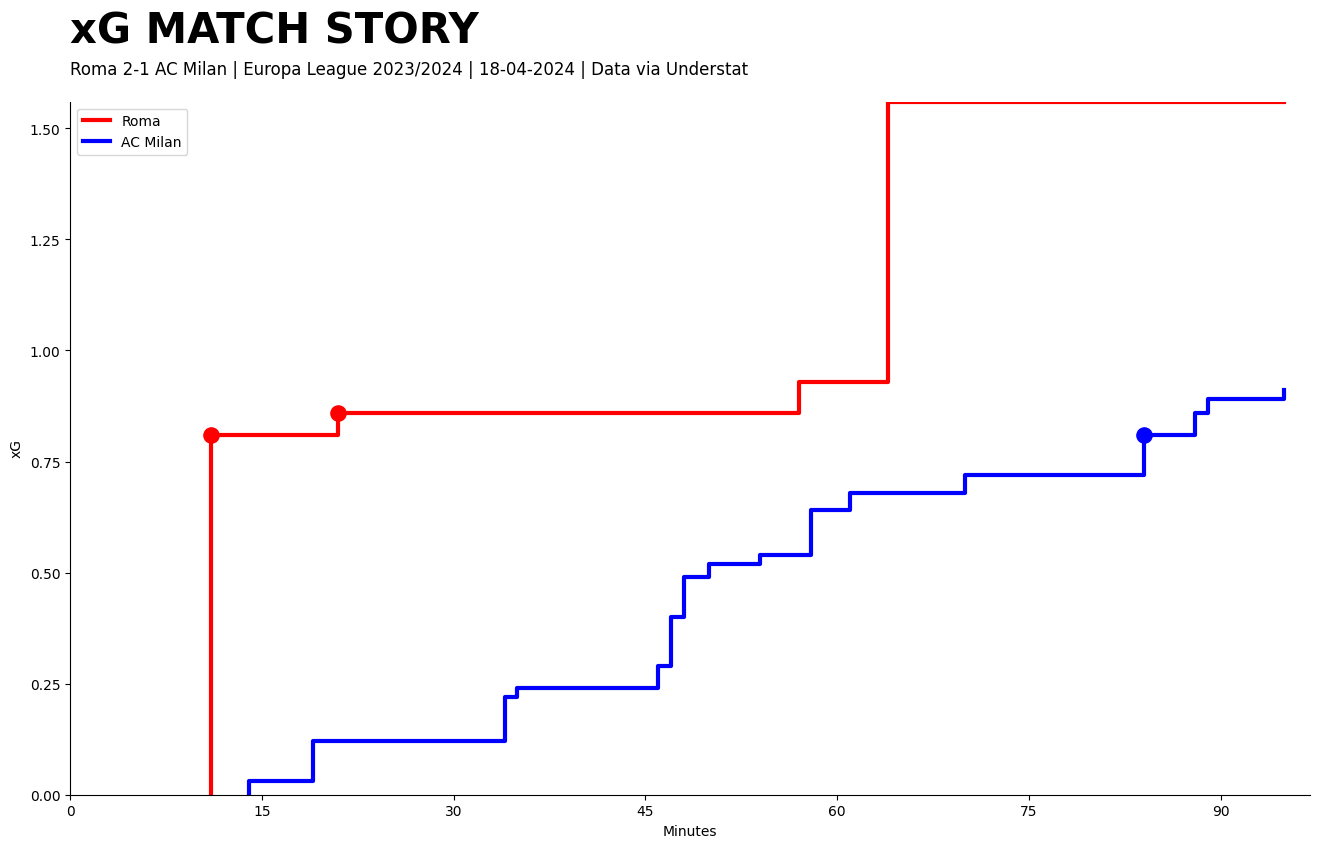

In [ ]:
lw = 3

fig, ax = plt.subplots()

#plt.subplots_adjust()
fig.set_size_inches(16, 9)

ax.plot(home_minute_shot, home_cum_xg, label=home_team, c='red', lw=lw)
ax.plot(away_minute_shot, away_cum_xg, label=away_team, c='blue', lw=lw)

ax.scatter(home_goal_minute, home_goal_cum_xG, c='red', s=120)
ax.scatter(away_goal_minute, away_goal_cum_xG, c='blue', s=120)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")

plt.text(0, max_xg + max_xg/7.5, s = "xG MATCH STORY", va='top', size=30, weight='bold')
plt.text(0, max_xg + max_xg/25, s = f"{home_team} {home_score}-{away_score} {away_team} | {Competition} {Season} | {Date} | Data via Understat", size=12)

plt.xlabel('Minutes')
plt.ylabel('xG')

plt.legend(loc=2)

plt.xlim(0, max(df.minute) + 2 if (max(df.minute) + 2 > 90) else 90)
plt.ylim(0, max_xg)

plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.yticks(np.arange(0, max_xg, 0.25))

plt.show()

In [ ]:
fig.savefig(f'D:\\Football\\Stats\\xG Match Story\\{home_team}_VS_{away_team}_xG_Match_Story.png', dpi=400)

In [ ]:
.END

SyntaxError: invalid syntax (1403085297.py, line 1)